<a href="https://colab.research.google.com/github/eleubner02/01-Stat-Arb-Pairs-Trading/blob/main/notebooks/pairs_trading_analysis_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
!pip install yfinance

In [27]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib as plt

In [28]:
stock1 = 'PEP'
stock2 = 'KO'

data = yf.download([stock1, stock2], start='2020-01-01', end='2025-01-01')

/tmp/ipython-input-284055099.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download([stock1, stock2], start='2020-01-01', end='2025-01-01')
[*********************100%***********************]  2 of 2 completed


<Axes: xlabel='Date'>

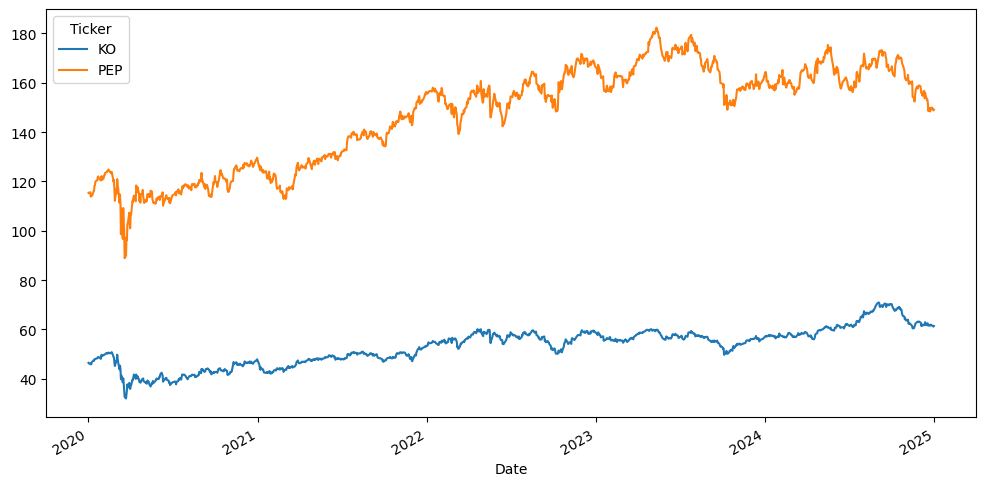

In [29]:
data['Close'].plot(figsize=(12,6))

In [30]:
import statsmodels.api as sm

Next, I will perform the Engle-Granger test to check for cointegration. This is critical because a stationary spread is required for a mean-reverting strategy to be viable.

In [32]:
test_statistic, p_value, critical_values = sm.tsa.stattools.coint(data['Close'][stock1], data['Close'][stock2], trend='c', method='aeg', maxlag=None, autolag='aic', return_results=None)

print(f"Cointegration Test Results:")
print(f"  Test Statistic: {test_statistic}")
print(f"  P-value: {p_value}")
print(f"  Critical Values (1%, 5%, 10%): {critical_values}")

if p_value < 0.05:
    print("\nBased on the p-value, we can reject the null hypothesis and conclude that ", stock1, " and ", stock2, " are likely cointegrated.")
else:
    print("\nBased on the p-value, we cannot reject the null hypothesis and there is not enough evidence to conclude that ", stock1, " and ", stock2, " are cointegrated.")

Cointegration Test Results:
  Test Statistic: -2.113591349162362
  P-value: 0.4692647695851515
  Critical Values (1%, 5%, 10%): [-3.90517395 -3.34099518 -3.04782579]

Based on the p-value, we cannot reject the null hypothesis and there is not enough evidence to conclude that  PEP  and  KO  are cointegrated.


### Cointegration Test Analysis

The Engle-Granger test resulted in a p-value of 0.469. The null hypothesis for this test is that the two series are not cointegrated. Since our p-value (0.469) is significantly greater than the standard significance level of 0.05, we fail to reject the null hypothesis.

**Conclusion:** There is no statistical evidence in this dataset to suggest that PEP and KO are cointegrated. Therefore, they are not a suitable pair for this pairs trading strategy.